<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/EDA_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E12 - Insurance Premium Prediction Dataset**

## Problem Statement

The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

## Dataset Overview

This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

### Features

1. Age: Age of the insured individual (Numerical)
2. Gender: Gender of the insured individual (Categorical: Male, Female)
3. Annual Income: Annual income of the insured individual (Numerical, skewed)
4. Marital Status: Marital status of the insured individual (Categorical: Single, Married, Divorced)
5. Number of Dependents: Number of dependents (Numerical, with missing values)
6. Education Level: Highest education level attained (Categorical: High School, Bachelor's, Master's, PhD)
7. Occupation: Occupation of the insured individual (Categorical: Employed, Self-Employed, Unemployed)
8. Health Score: A score representing the health status (Numerical, skewed)
9. Location: Type of location (Categorical: Urban, Suburban, Rural)
10. Policy Type: Type of insurance policy (Categorical: Basic, Comprehensive, Premium)
11. Previous Claims: Number of previous claims made (Numerical, with outliers)
12. Vehicle Age: Age of the vehicle insured (Numerical)
13. Credit Score: Credit score of the insured individual (Numerical, with missing values)
14. Insurance Duration: Duration of the insurance policy (Numerical, in years)
15. Premium Amount: Target variable representing the insurance premium amount (Numerical, skewed)
16. Policy Start Date: Start date of the insurance policy (Text, improperly formatted)
17. Customer Feedback: Short feedback comments from customers (Text)
18. Smoking Status: Smoking status of the insured individual (Categorical: Yes, No)
19. Exercise Frequency: Frequency of exercise (Categorical: Daily, Weekly, Monthly, Rarely)
20. Property Type: Type of property owned (Categorical: House, Apartment, Condo)

# Data Characteristics

- Missing Values: Certain features contain missing values to simulate real-world data collection issues.
- Incorrect Data Types: Some fields are intentionally set to incorrect data types to practice data cleaning.
- Skewed Distributions: Numerical features like **Annual Income** and **Premium Amount** have skewed distributions, which can be addressed through transformations.

In [1]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
!pip install optuna-integration-pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

!pip install category-encoders
!pip install optuna-integration

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!pip install skops

from pytorch_tabnet.tab_model import TabNetRegressor

In [2]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-2-b603d7214877>:112: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


<Figure size 640x480 with 0 Axes>

In [3]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

<Figure size 960x660 with 0 Axes>

In [4]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/train_no_nan.csv')

df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/test_no_nan.csv')

df_test_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/test.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_train_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/train.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/sample_submission.csv",
     index_col='id',
)

# df_orig = pd.read_csv(
#     "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
#      parse_dates=['Policy Start Date'],
#     #     index_col='id',
# )


mapping = {2.0:0.0,0.0:1.0,1.0:2.0}
df_train["Customer Feedback"] = df_train["Customer Feedback"].map(mapping)
df_test["Customer Feedback"] = df_test["Customer Feedback"].map(mapping)

In [6]:
# # Convert `Policy Start Date` column to datetime64 format
# df_orig['Policy Start Date'] = pd.to_datetime(df_orig['Policy Start Date'])

# # Calculate the difference in days between today and the `Policy Start Date` column
# today = pd.to_datetime('today')
# difference_in_days = today - df_orig['Policy Start Date']

# # Divide the difference in days by 365 to get the difference in years
# difference_in_years = difference_in_days / pd.Timedelta(days=365)

# # Convert the `Policy Start Date` column to the number of years since the policy start date
# df_orig['Policy Start Date'] = difference_in_years

In [7]:
df_train["Start_Year"] = df_train_orig["Policy Start Date"].dt.year
df_train["Start_Month"] = df_train_orig["Policy Start Date"].dt.month
df_train["Start_Day"] = df_train_orig["Policy Start Date"].dt.day

df_test["Start_Year"] = df_test_orig["Policy Start Date"].dt.year.values
df_test["Start_Month"] = df_test_orig["Policy Start Date"].dt.month.values
df_test["Start_Day"] = df_test_orig["Policy Start Date"].dt.day.values

In [8]:
# df_orig.dropna(axis=0,how="any").shape
df_train_orig.head()
#df_test["Policy Start Date"].dt.year

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [9]:
df_train.shape, df_test.shape, df_subm.shape #, df_orig.shape, df_orig.shape

((1200000, 23), (800000, 23), (800000, 1))

In [10]:
print("Pytorch Version: {}".format(torch.__version__))
print("SKLearn Version: {}".format(sklearn.__version__))

Pytorch Version: 2.5.1+cu121
SKLearn Version: 1.5.2


In [11]:
100*df_train.isnull().sum()/df_train.shape[0]

,0
Age,0.0
Gender,0.0
Annual Income,0.0
Marital Status,0.0
Number of Dependents,0.0
Education Level,0.0
Occupation,0.0
Health Score,0.0
Location,0.0
Policy Type,0.0


In [12]:
100*df_test.isnull().sum()/df_test.shape[0]

,0
Age,0.0
Gender,0.0
Annual Income,0.0
Marital Status,0.0
Number of Dependents,0.0
Education Level,0.0
Occupation,0.0
Health Score,0.0
Location,0.0
Policy Type,0.0


In [13]:
df_train.head(3)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  float64
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  float64
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Policy Start Date     1200000 non-

In [14]:
df_train.nunique()

,0
Age,47
Gender,2
Annual Income,91633
Marital Status,3
Number of Dependents,5
Education Level,4
Occupation,3
Health Score,532670
Location,3
Policy Type,3


In [15]:
categorical_cols = ["Gender","Marital Status","Number of Dependents","Education Level","Occupation","Location","Policy Type","Previous Claims","Insurance Duration","Customer Feedback","Smoking Status","Exercise Frequency","Property Type",
                    "Start_Year","Start_Month","Start_Day"]
numerical_cols = ["Age","Annual Income","Health Score","Vehicle Age","Credit Score","Policy Start Date"]

target = ['Premium Amount']

len(categorical_cols+numerical_cols+target),len(df_train.columns)

df_train[categorical_cols] = df_train[categorical_cols].astype('category')
df_test[categorical_cols] = df_test[categorical_cols].astype('category')

df_train[numerical_cols] = df_train[numerical_cols].astype(np.float64)
df_test[numerical_cols] = df_test[numerical_cols].astype(np.float64)

## 1.0 Time Features:

Here the following features are reviewed:

* "Start_Year"
* "Start_Month"
* "Start_Day"
* "Policy Start Date"

### **Year**

In [16]:
# ts_monthly = df_train.groupby(["Start_Year"], as_index=False)["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
# ts_monthly_test = df_test.groupby(["Start_Year"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly["mean"].plot(color="#0485d1", ax=axs[0])
# ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
# ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])

### **Month**

In [17]:
# ts_monthly = df_train.groupby(["Start_Month"], as_index=False)["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
# ts_monthly_test = df_test.groupby(["Start_Month"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly["mean"].plot(color="#0485d1", ax=axs[0])

# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])

### **Year and Month**

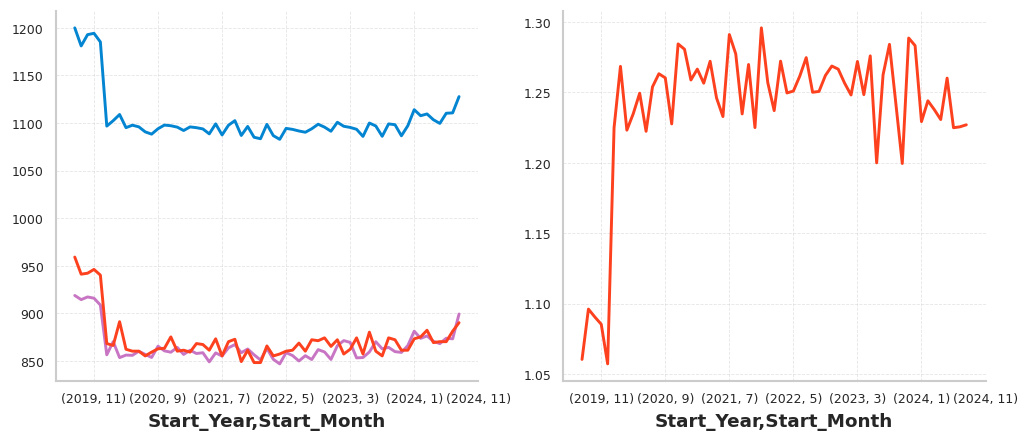

In [18]:
ts_monthly = df_train.groupby(["Start_Year","Start_Month"])["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
ts_monthly_test = df_test.groupby(["Start_Year","Start_Month"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

fig, axs = plt.subplots(1,2,figsize=(10, 4))
ts_monthly["mean"].plot(color="#0485d1", ax=axs[0])
ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])
plt.show()

In [19]:
ts_monthly=ts_monthly.dropna(axis=0,how="any")
ts_monthly_test=ts_monthly_test.dropna(axis=0,how="any")
ts_monthly.head()

mean         std      skew  median   min  \
Start_Year Start_Month                                                    
2019       8            1200.095850  918.590068  1.060338   959.0  20.0   
           9            1181.109920  914.230780  1.096057   941.0  20.0   
           10           1192.948540  917.021703  1.090440   942.0  20.0   
           11           1194.380737  915.723280  1.085282   946.0  20.0   
           12           1185.284538  908.536001  1.057175   940.0  20.0   

                           max  count  
Start_Year Start_Month                 
2019       8            4981.0   8868  
           9            4988.0  19596  
           10           4984.0  19355  
           11           4988.0  17889  
           12           4988.0  18581

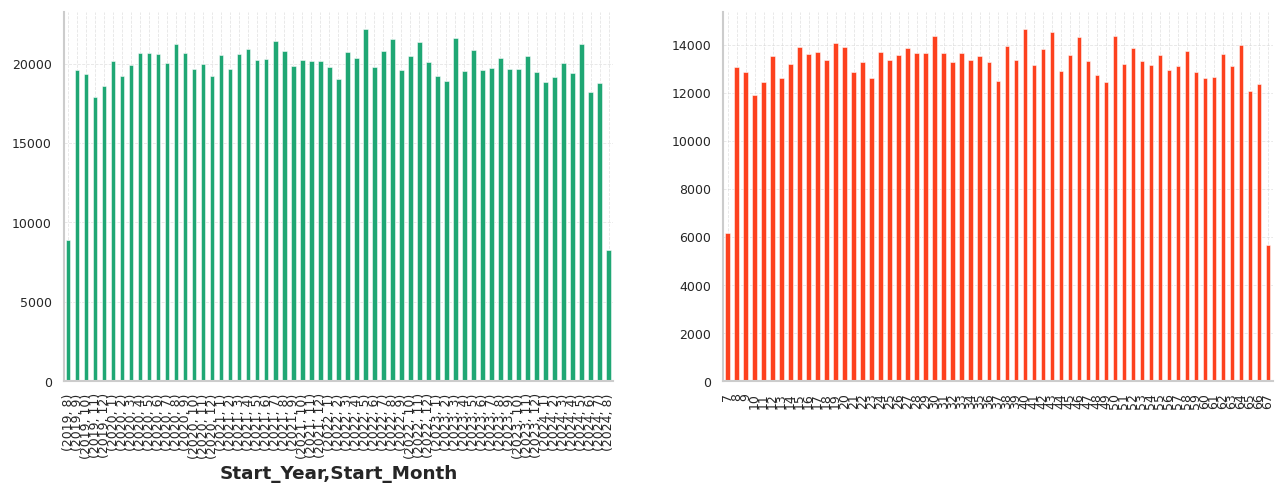

In [20]:
fig, axs = plt.subplots(1,2,figsize=(13, 4))
ts_monthly["count"].plot(kind="bar",color="#1fa774", ax=axs[0])
ts_monthly_test["count"].plot(kind="bar",color="#fd411e", ax=axs[1])
plt.show()

<Axes: >

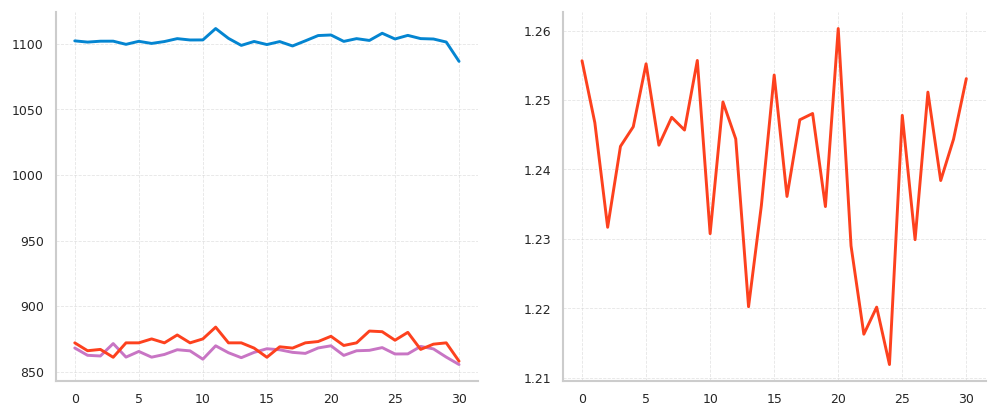

In [21]:
ts_day = df_train.groupby(["Start_Day"], as_index=False)["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
ts_day_test = df_test.groupby(["Start_Day"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

fig, axs = plt.subplots(1,2,figsize=(10, 4))
ts_day["mean"].plot(color="#0485d1", ax=axs[0])
ts_day["std"].plot(color="#c875c4", ax=axs[0])
ts_day["median"].plot(color="#fd411e", ax=axs[0])
ts_day["skew"].plot(color="#fd411e", ax=axs[1])

<Axes: >

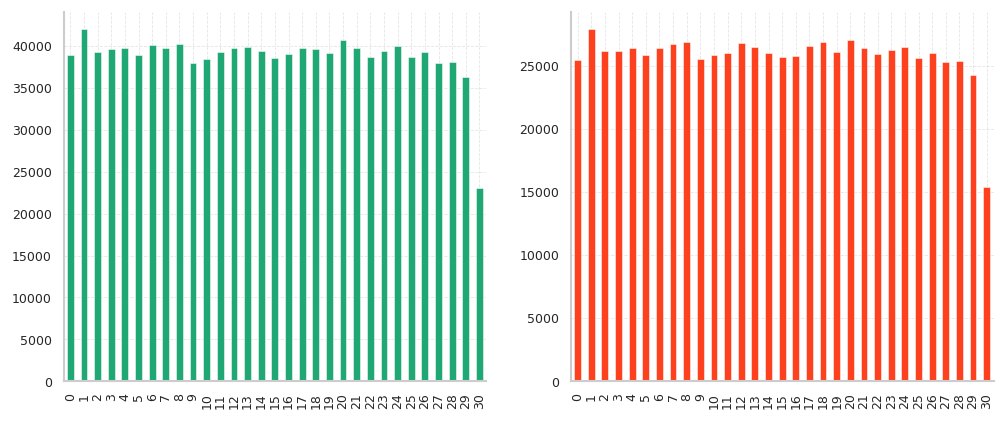

In [22]:
fig, axs = plt.subplots(1,2,figsize=(10, 4))
ts_day["count"].plot(kind="bar",color="#1fa774", ax=axs[0])
ts_day_test["count"].plot(kind="bar",color="#fd411e", ax=axs[1])

In [23]:
ts_monthly_test

,Start_Year,Start_Month,mean,std,skew,min,max,count
7,2019,8,25.438731,12.155909,0.260795,2.535950,53.929114,6180
8,2019,9,25.853526,11.850113,0.242168,2.352529,55.858405,13064
9,2019,10,25.811580,12.014133,0.228149,2.153887,55.391965,12886
10,2019,11,25.787736,12.020915,0.259106,2.095544,55.482646,11906
11,2019,12,25.606343,12.040425,0.275727,2.036747,55.095971,12449
...,...,...,...,...,...,...,...,...
63,2024,4,25.480444,11.776720,0.307920,2.121629,56.302032,13131
64,2024,5,25.612147,11.715918,0.273514,2.137847,57.386945,14007
65,2024,6,25.606927,11.900429,0.272831,2.625528,57.527415,12077
66,2024,7,25.591766,11.875766,0.282534,2.166346,55.512656,12355


### **Year and Month + Policy Type**

In [24]:
ts_monthly = df_train.groupby(["Start_Year","Start_Month","Policy Type"], as_index=False)[["Premium Amount"]].agg(["mean"])
# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly[("Premium Amount","mean")].plot(ax=axs[0])
# ts_monthly[("Credit Score","mean")].plot(ax=axs[1])
# ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
# ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])

<Axes: >

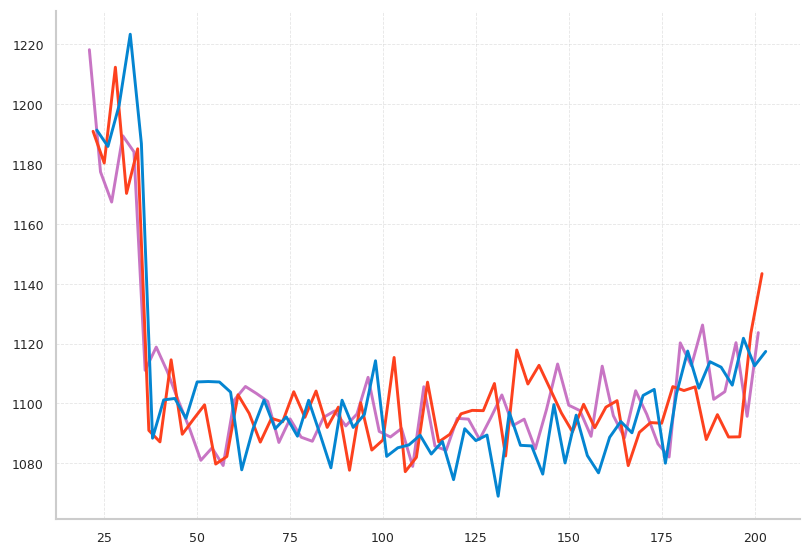

In [25]:
ts_monthly[ts_monthly["Policy Type"]=="Basic"][("Premium Amount","mean")].plot(color="#c875c4")
ts_monthly[ts_monthly["Policy Type"]=="Comprehensive"][("Premium Amount","mean")].plot(color="#fd411e")
ts_monthly[ts_monthly["Policy Type"]=="Premium"][("Premium Amount","mean")].plot(color="#0485d1")

In [26]:
ts_monthly

,Start_Year,Start_Month,Policy Type,Premium Amount
,,,,mean
0,2019,1,Basic,NaN
1,2019,1,Comprehensive,NaN
2,2019,1,Premium,NaN
3,2019,2,Basic,NaN
4,2019,2,Comprehensive,NaN
...,...,...,...,...
211,2024,11,Comprehensive,NaN
212,2024,11,Premium,NaN
213,2024,12,Basic,NaN


### **Year and Month + Customer Feedback + Policy Type**

In [27]:
ts_monthly = df_train.groupby(["Start_Year","Start_Month","Customer Feedback","Policy Type"], as_index=False)[["Premium Amount"]].agg(["mean"])
# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly[("Premium Amount","mean")].plot(ax=axs[0])
# ts_monthly[("Credit Score","mean")].plot(ax=axs[1])
# ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
# ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])
ts_monthly.head()

,Start_Year,Start_Month,Customer Feedback,Policy Type,Premium Amount
,,,,,mean
0,2019,1,0.0,Basic,NaN
1,2019,1,0.0,Comprehensive,NaN
2,2019,1,0.0,Premium,NaN
3,2019,1,1.0,Basic,NaN
4,2019,1,1.0,Comprehensive,NaN


<Axes: >

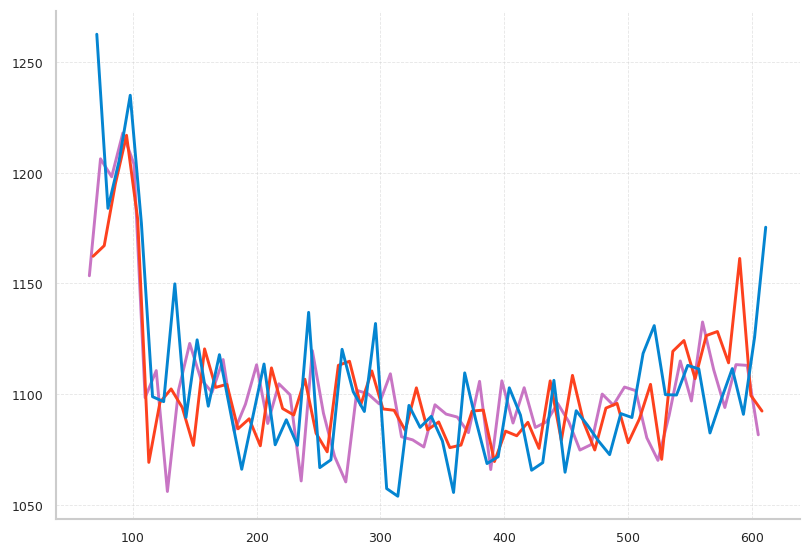

In [28]:
ts_monthly[(ts_monthly["Customer Feedback"]==0)&(ts_monthly["Policy Type"]=="Premium")][("Premium Amount","mean")].plot(color="#c875c4")
ts_monthly[(ts_monthly["Customer Feedback"]==1)&(ts_monthly["Policy Type"]=="Premium")][("Premium Amount","mean")].plot(color="#fd411e")
ts_monthly[(ts_monthly["Customer Feedback"]==2)&(ts_monthly["Policy Type"]=="Premium")][("Premium Amount","mean")].plot(color="#0485d1")

<Axes: >

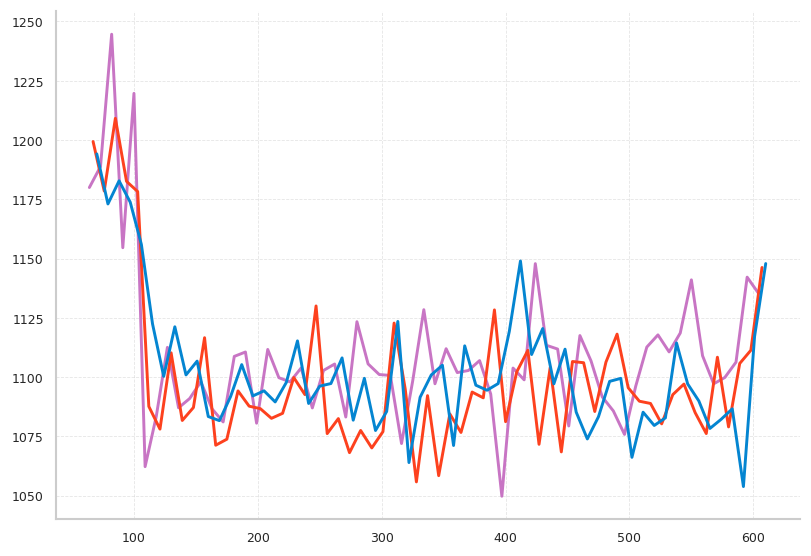

In [29]:
ts_monthly[(ts_monthly["Customer Feedback"]==0)&(ts_monthly["Policy Type"]=="Comprehensive")][("Premium Amount","mean")].plot(color="#c875c4")
ts_monthly[(ts_monthly["Customer Feedback"]==1)&(ts_monthly["Policy Type"]=="Comprehensive")][("Premium Amount","mean")].plot(color="#fd411e")
ts_monthly[(ts_monthly["Customer Feedback"]==2)&(ts_monthly["Policy Type"]=="Comprehensive")][("Premium Amount","mean")].plot(color="#0485d1")

<Axes: >

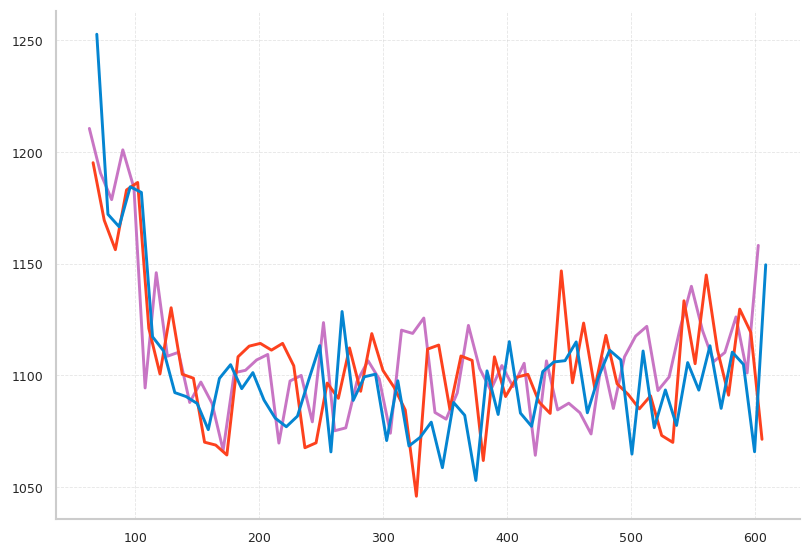

In [30]:
ts_monthly[(ts_monthly["Customer Feedback"]==0)&(ts_monthly["Policy Type"]=="Basic")][("Premium Amount","mean")].plot(color="#c875c4")
ts_monthly[(ts_monthly["Customer Feedback"]==1)&(ts_monthly["Policy Type"]=="Basic")][("Premium Amount","mean")].plot(color="#fd411e")
ts_monthly[(ts_monthly["Customer Feedback"]==2)&(ts_monthly["Policy Type"]=="Basic")][("Premium Amount","mean")].plot(color="#0485d1")

#### Add Mean to Dataset:

In [31]:
ts_monthly.head(3)
ts_monthly = ts_monthly.droplevel(level=1,axis=1).rename(columns={'Premium Amount': 'Premium_time_Mean'})

In [32]:
ts_monthly.head()

,Start_Year,Start_Month,Customer Feedback,Policy Type,Premium_time_Mean
0,2019,1,0.0,Basic,NaN
1,2019,1,0.0,Comprehensive,NaN
2,2019,1,0.0,Premium,NaN
3,2019,1,1.0,Basic,NaN
4,2019,1,1.0,Comprehensive,NaN


In [33]:
df_train_new = pd.merge(df_train, ts_monthly, on=["Start_Year","Start_Month","Customer Feedback","Policy Type"], how='left')
df_test_new = pd.merge(df_test, ts_monthly, on=["Start_Year","Start_Month","Customer Feedback","Policy Type"], how='left')

In [34]:
df_train_new.isna().sum(),df_test_new.isna().sum()

(Age                     0
 Gender                  0
 Annual Income           0
 Marital Status          0
 Number of Dependents    0
 Education Level         0
 Occupation              0
 Health Score            0
 Location                0
 Policy Type             0
 Previous Claims         0
 Vehicle Age             0
 Credit Score            0
 Insurance Duration      0
 Policy Start Date       0
 Customer Feedback       0
 Smoking Status          0
 Exercise Frequency      0
 Property Type           0
 Premium Amount          0
 Start_Year              0
 Start_Month             0
 Start_Day               0
 Premium_time_Mean       0
 dtype: int64,
 Age                          0
 Gender                       0
 Annual Income                0
 Marital Status               0
 Number of Dependents         0
 Education Level              0
 Occupation                   0
 Health Score                 0
 Location                     0
 Policy Type                  0
 Previous Claims 

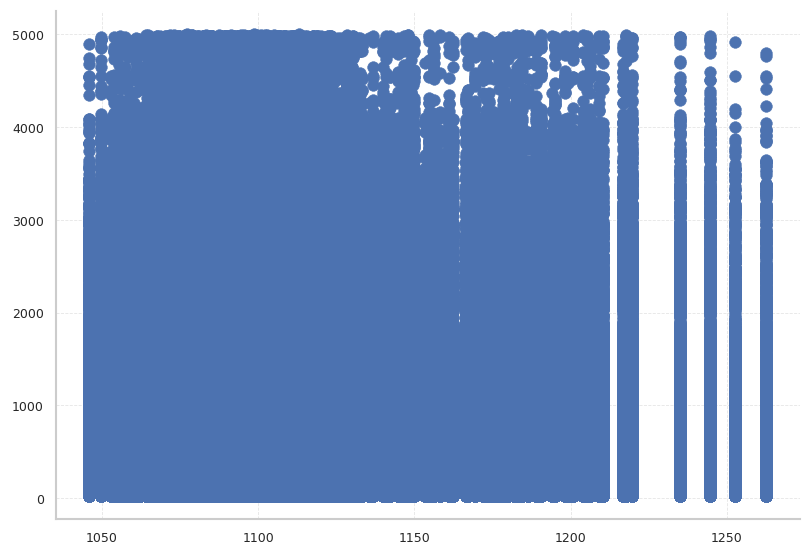

In [35]:
plt.scatter(df_train_new["Premium_time_Mean"],df_train_new["Premium Amount"])
plt.show()

In [36]:
df_train_new.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Start_Year,Start_Month,Start_Day,Premium_time_Mean
0,19.0,Female,10049.0,1.0,1.0,Bachelor's,1.0,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,0.955634,0.0,No,Weekly,House,2869.0,2023,12,23,1090.306893
1,39.0,Female,31678.0,0.0,3.0,Master's,0.0,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1.487141,1.0,Yes,Monthly,House,1483.0,2023,6,12,1106.265011
2,23.0,Male,25602.0,0.0,3.0,High School,1.0,47.177549,Suburban,Premium,1.0,14.0,605.0,3.0,1.185771,2.0,Yes,Weekly,House,567.0,2023,9,30,1118.329945
3,21.0,Male,141855.0,1.0,2.0,Bachelor's,2.0,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,0.484401,0.0,Yes,Daily,Apartment,765.0,2024,6,12,1126.142140
4,21.0,Male,39651.0,2.0,1.0,Bachelor's,1.0,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,3.015908,0.0,Yes,Weekly,House,2022.0,2021,12,1,1080.669528


### **Year and Month + Customer Feedback + Policy Type**

In [37]:
ts_monthly = df_train.groupby(["Start_Year","Start_Month","Smoking Status","Policy Type"], as_index=False)[["Premium Amount"]].agg(["mean"])
# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly[("Premium Amount","mean")].plot(ax=axs[0])
# ts_monthly[("Credit Score","mean")].plot(ax=axs[1])
# ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
# ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])
ts_monthly.head()

,Start_Year,Start_Month,Smoking Status,Policy Type,Premium Amount
,,,,,mean
0,2019,1,No,Basic,NaN
1,2019,1,No,Comprehensive,NaN
2,2019,1,No,Premium,NaN
3,2019,1,Yes,Basic,NaN
4,2019,1,Yes,Comprehensive,NaN


<Axes: >

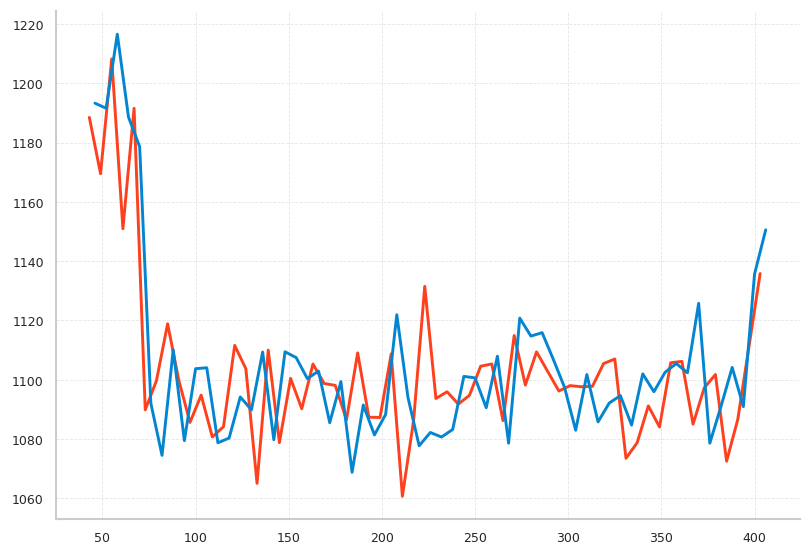

In [38]:
ts_monthly[(ts_monthly["Smoking Status"]=="No")&(ts_monthly["Policy Type"]=="Comprehensive")][("Premium Amount","mean")].plot(color="#fd411e")
ts_monthly[(ts_monthly["Smoking Status"]=="Yes")&(ts_monthly["Policy Type"]=="Comprehensive")][("Premium Amount","mean")].plot(color="#0485d1")

## Previous Claims and Policy Type:

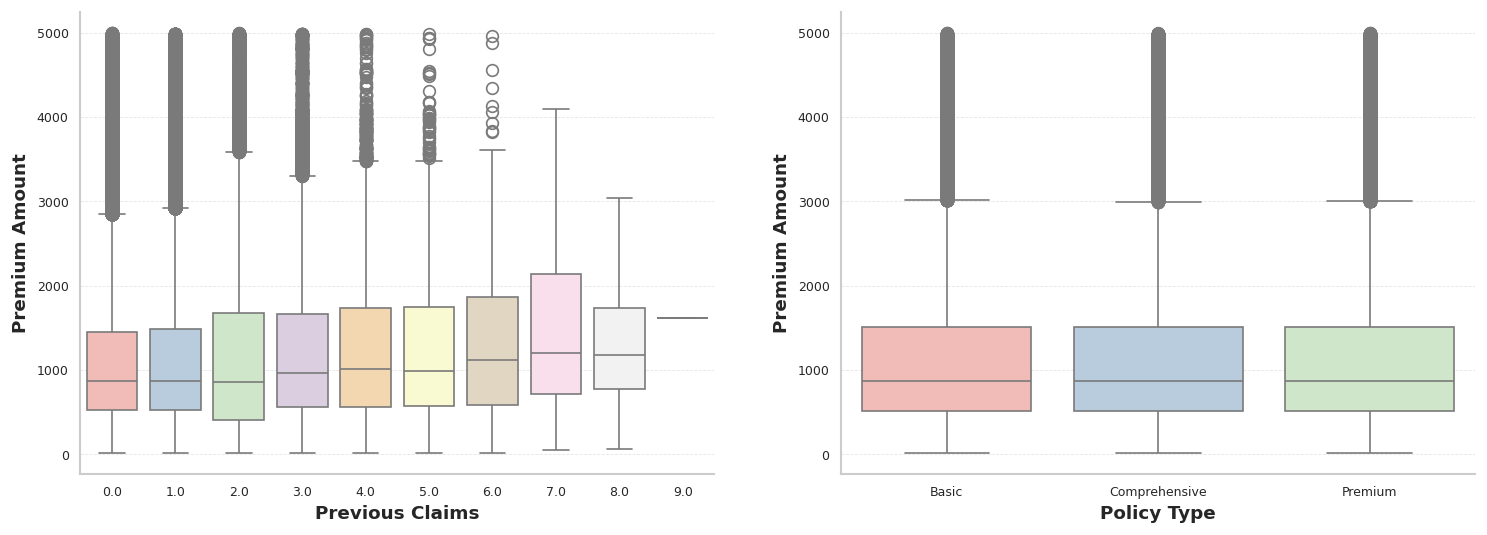

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plt_1 = sns.boxplot(data=df_train_new, x='Previous Claims', y='Premium Amount', ax=ax[0], palette=palette_9)
plt_2 = sns.boxplot(data=df_train_new, x='Policy Type', y='Premium Amount', ax=ax[1], palette=palette_9);

In [40]:
df_train_new[df_train_new["Previous Claims"]==9]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Start_Year,Start_Month,Start_Day,Premium_time_Mean
491125,38.0,Male,18093.0,0.0,4.0,Bachelor's,0.0,25.0,Urban,Premium,9.0,13.0,626.0,9.0,3.829607,0.0,Yes,Daily,Apartment,1614.0,2021,2,7,1099.641587


In [41]:
df_test_new[df_test_new["Previous Claims"]==9]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Start_Year,Start_Month,Start_Day,Premium_time_Mean
102311,48.0,Female,2392.0,0.0,0.0,Master's,1.0,25.838981,Urban,Premium,9.0,16.0,697.0,4.0,5.037826,2.0,No,Weekly,House,NaN,2019,11,24,1234.976675
106454,49.0,Female,43899.0,1.0,1.0,Bachelor's,1.0,7.941154,Urban,Basic,9.0,18.0,729.0,1.0,1.766593,2.0,No,Weekly,Condo,NaN,2023,3,2,1114.964007
326452,55.0,Female,2460.0,1.0,0.0,High School,2.0,8.427036,Rural,Comprehensive,9.0,12.0,751.0,2.0,2.084401,0.0,No,Weekly,Apartment,NaN,2022,11,6,1098.816521
356373,50.0,Male,44284.0,2.0,2.0,PhD,2.0,8.787593,Suburban,Basic,9.0,6.0,552.0,8.0,0.750155,0.0,Yes,Weekly,House,NaN,2024,3,7,1120.038641
359021,44.0,Female,3696.0,0.0,0.0,Bachelor's,1.0,24.000000,Urban,Comprehensive,9.0,8.0,603.0,2.0,4.429607,1.0,No,Weekly,House,NaN,2020,7,3,1071.240372
376445,25.0,Female,90914.0,0.0,2.0,Master's,2.0,25.000000,Rural,Premium,9.0,3.0,524.0,3.0,2.489881,0.0,No,Daily,Condo,NaN,2022,6,11,1082.526905
479195,33.0,Male,135563.0,0.0,1.0,Bachelor's,0.0,28.914782,Rural,Comprehensive,9.0,19.0,566.0,9.0,4.465223,0.0,Yes,Monthly,House,NaN,2020,6,20,1098.025486
487061,34.0,Male,14062.0,2.0,1.0,Bachelor's,0.0,8.592276,Urban,Comprehensive,9.0,19.0,744.0,5.0,4.029607,2.0,Yes,Rarely,House,NaN,2020,11,26,1094.190712


In [42]:
df_train_new[df_train_new["Previous Claims"]==8].shape, df_test_new[df_test_new["Previous Claims"]==8].shape

((8, 24), (4, 24))

## Customer Feedback and Insurance Duration:

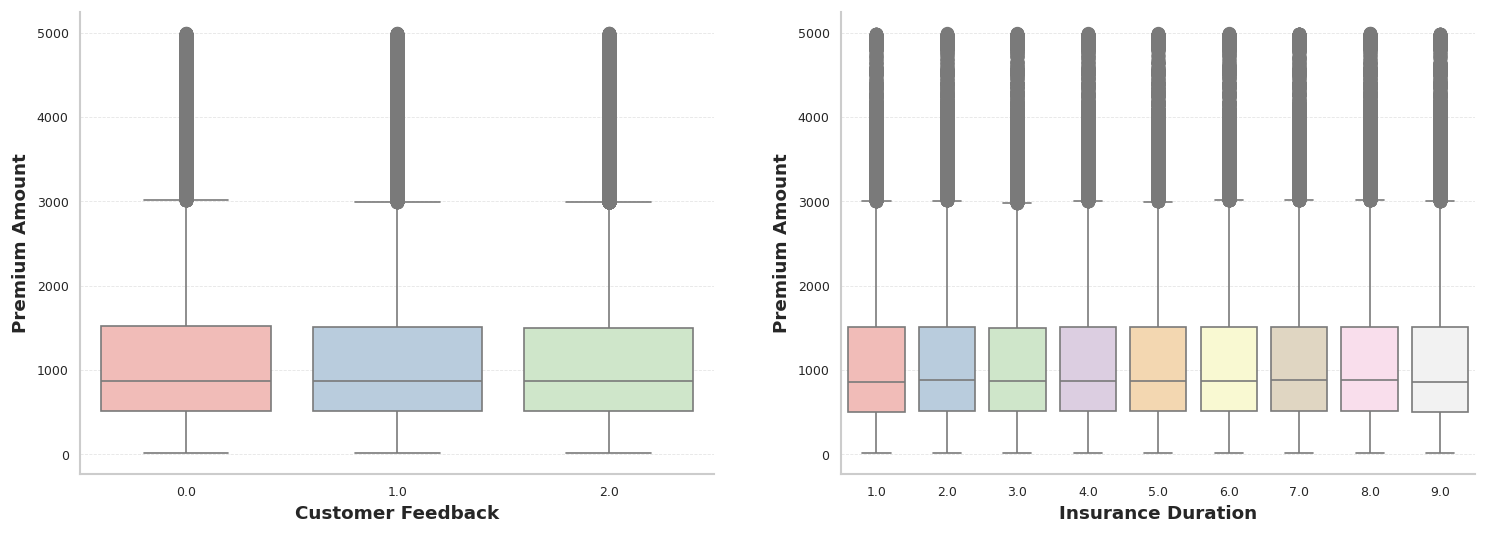

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plt_1 = sns.boxplot(data=df_train_new, x='Customer Feedback', y='Premium Amount', ax=ax[0], palette=palette_9)
plt_2 = sns.boxplot(data=df_train_new, x='Insurance Duration', y='Premium Amount', ax=ax[1], palette=palette_9);

## Annual Income and Credit Score:

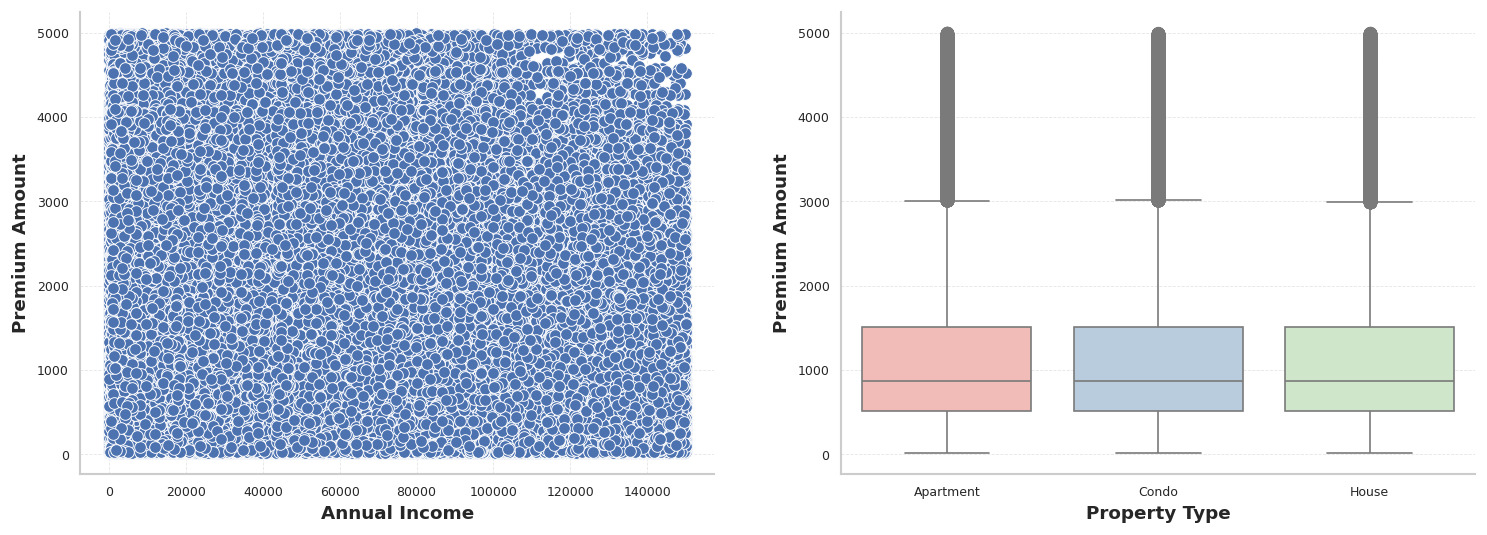

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plt_1 = sns.scatterplot(data=df_train_new, x='Annual Income', y='Premium Amount',ax=ax[0], palette=palette_9)
plt_2 = sns.boxplot(data=df_train_new, x='Property Type', y='Premium Amount', ax=ax[1], palette=palette_9);

#### **Number of Dependents and Marital Status**

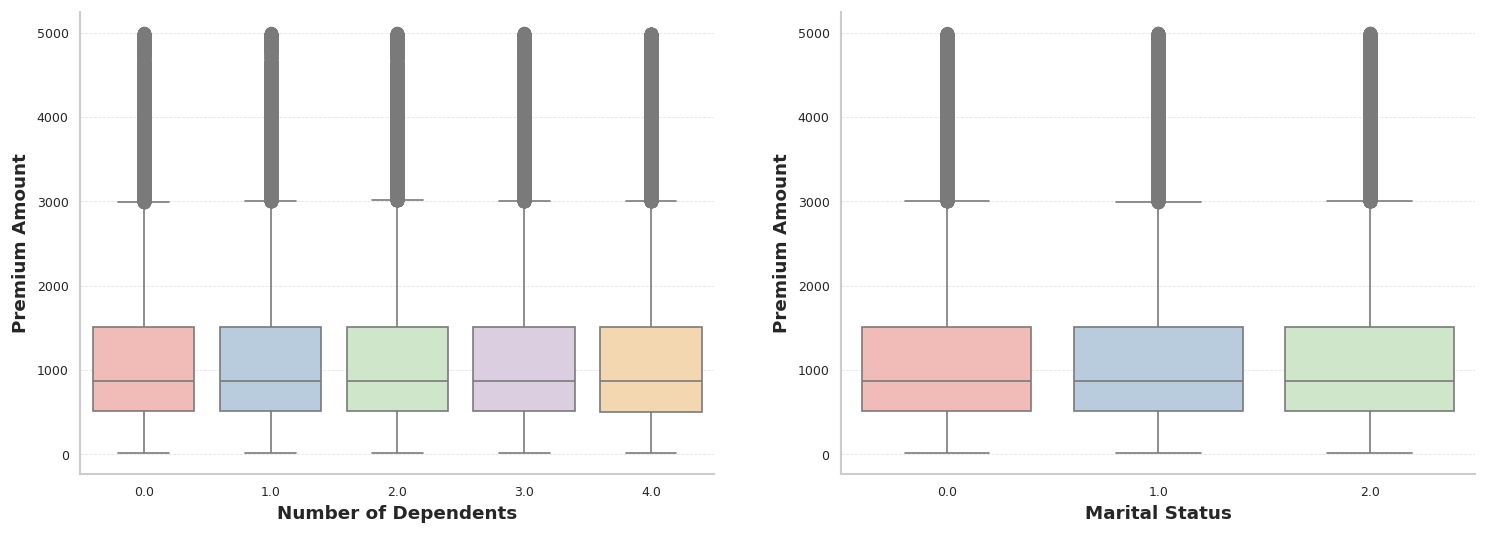

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plt_1 = sns.boxplot(data=df_train_new, x='Number of Dependents', y='Premium Amount',ax=ax[0], palette=palette_9)
plt_2 = sns.boxplot(data=df_train_new, x='Marital Status', y='Premium Amount', ax=ax[1], palette=palette_9);

In [46]:
df_train_new["Property Type"].nunique(),df_train_new["Property Type"].unique()

(3,
 ['House', 'Apartment', 'Condo']
 Categories (3, object): ['Apartment', 'Condo', 'House'])

In [47]:
def replace_entries(df):

  map_gender = {'Male': 0, 'Female': 1}
  df['Gender'] = df['Gender'].map(map_gender)

  map_education = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
  df['Education Level'] = df['Education Level'].map(map_education)

  map_loc = {'Rural': 0, 'Suburban': 1, 'Urban': 2}
  df['Location'] = df['Location'].map(map_loc)

  map_policy = {'Basic': 0, 'Comprehensive': 1, 'Premium': 2}
  df['Policy Type'] = df['Policy Type'].map(map_policy)

  map_smoking = {'No': 0, 'Yes': 1}
  df['Smoking Status'] = df['Smoking Status'].map(map_smoking)

  map_exercise = {'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3}
  df['Exercise Frequency'] = df['Exercise Frequency'].map(map_exercise)

  map_property = {'Condo': 0, 'Apartment': 1, 'House': 2}
  df['Property Type'] = df['Property Type'].map(map_property)

  return df

df_train_new = replace_entries(df_train_new)
df_test_new = replace_entries(df_test_new)


In [48]:
df_train_new.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Start_Year,Start_Month,Start_Day,Premium_time_Mean
0,19.0,1,10049.0,1.0,1.0,1,1.0,22.598761,2,2,2.0,17.0,372.0,5.0,0.955634,0.0,0,2,2,2869.0,2023,12,23,1090.306893
1,39.0,1,31678.0,0.0,3.0,2,0.0,15.569731,0,1,1.0,12.0,694.0,2.0,1.487141,1.0,1,1,2,1483.0,2023,6,12,1106.265011
2,23.0,0,25602.0,0.0,3.0,0,1.0,47.177549,1,2,1.0,14.0,605.0,3.0,1.185771,2.0,1,2,2,567.0,2023,9,30,1118.329945
3,21.0,0,141855.0,1.0,2.0,1,2.0,10.938144,0,0,1.0,0.0,367.0,1.0,0.484401,0.0,1,3,1,765.0,2024,6,12,1126.142140
4,21.0,0,39651.0,2.0,1.0,1,1.0,20.376094,0,2,0.0,8.0,598.0,4.0,3.015908,0.0,1,2,2,2022.0,2021,12,1,1080.669528


In [49]:
df_train_new.describe(include="all").T
#df_train_new.info()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1200000.0,NaN,NaN,NaN,41.145390,13.434360,18.000000,30.000000,41.000000,53.000000,64.000000
Gender,1200000.0,2.0,0.0,602571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual Income,1200000.0,NaN,NaN,NaN,32360.595836,31661.016523,1.000000,8603.000000,23862.000000,43936.000000,149997.000000
Marital Status,1200000.0,3.0,2.0,403380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Dependents,1200000.0,5.0,3.0,258393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,1200000.0,4.0,2.0,303818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,1200000.0,3.0,0.0,464964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health Score,1200000.0,NaN,NaN,NaN,25.641400,11.829315,2.012237,16.554572,25.000000,33.772890,58.975914
Location,1200000.0,3.0,1.0,401542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Policy Type,1200000.0,3.0,2.0,401846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cat_cols = ['Gender', 'Marital Status','Number of Dependents','Occupation','Location','Policy Type','Previous Claims', 'Insurance Duration', 'Customer Feedback',
            'Smoking Status',  'Exercise Frequency', 'Property Type', 'Start_Year', 'Start_Month', 'Start_Day','Education Level']

num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Policy Start Date', 'Premium Amount', 'Premium_time_Mean']

dtypes_num = {c:"float" for c in num_cols}
dtypes_cat = {c:"category" for c in cat_cols}

dtypes_all = {**dtypes_num, **dtypes_cat}

len(cat_cols+num_cols),len(dtypes_all.keys())#,len(df_train_new.columns)

(24, 24)

In [19]:
#df_train_new.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_train_v3.csv', index=False)
#df_test_new.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_test_v3.csv', index=False)

df_train_new = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_train_v3.csv', dtype=dtypes_all)
df_test_new = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_test_v3.csv', dtype=dtypes_all)

In [20]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Age                   1200000 non-null  float64 
 1   Gender                1200000 non-null  category
 2   Annual Income         1200000 non-null  float64 
 3   Marital Status        1200000 non-null  category
 4   Number of Dependents  1200000 non-null  category
 5   Education Level       1200000 non-null  category
 6   Occupation            1200000 non-null  category
 7   Health Score          1200000 non-null  float64 
 8   Location              1200000 non-null  category
 9   Policy Type           1200000 non-null  category
 10  Previous Claims       1200000 non-null  category
 11  Vehicle Age           1200000 non-null  float64 
 12  Credit Score          1200000 non-null  float64 
 13  Insurance Duration    1200000 non-null  category
 14  Policy Start Date 

In [21]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Age                   800000 non-null  float64 
 1   Gender                800000 non-null  category
 2   Annual Income         800000 non-null  float64 
 3   Marital Status        800000 non-null  category
 4   Number of Dependents  800000 non-null  category
 5   Education Level       800000 non-null  category
 6   Occupation            800000 non-null  category
 7   Health Score          800000 non-null  float64 
 8   Location              800000 non-null  category
 9   Policy Type           800000 non-null  category
 10  Previous Claims       800000 non-null  category
 11  Vehicle Age           800000 non-null  float64 
 12  Credit Score          800000 non-null  float64 
 13  Insurance Duration    800000 non-null  category
 14  Policy Start Date     800000 non-nul

## **MODELS**

**FUNCTIONS**

In [31]:
cat_cols = ['Gender', 'Marital Status','Number of Dependents','Occupation','Location','Policy Type','Previous Claims', 'Insurance Duration', 'Customer Feedback',
            'Smoking Status',  'Exercise Frequency', 'Property Type', 'Start_Year', 'Start_Month', 'Start_Day','Education Level']

num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Policy Start Date', 'Premium_time_Mean']

params ={'reg_alpha': 0.4932, 'reg_lambda': 0.002076, 'max_depth': 21, 'colsample_bytree': 0.825, 'subsample': 0.75, 'num_leaves': 101, 'n_estimators': 2501, 'learning_rate': 0.01,
         'min_child_samples':35, 'random_state': 42, 'force_col_wise':True, 'verbose':-1}

In [32]:
def rmsle_obj(y_true, y_pred):
    grad = -2 * (np.log1p(y_true) - np.log1p(y_pred)) / (y_pred + 1)
    hess = 2 * (np.log1p(y_true) - np.log1p(y_pred) + 1) / ((y_pred + 1) ** 2)
    return grad, hess

def rmsle_objective(y_true, y_pred):
    y_pred = np.log1p(y_pred)  # Apply log1p(x) = log(1 + x) to predicted values
    y_true = np.log1p(y_true)  # Apply log1p to true values
    grad = (y_pred - y_true) / (y_pred * y_true)
    hess = 1 / (y_pred * y_true)
    return grad, hess

# Model Training
def train_lgbm(params, X, y, cat_loc, use_gpu=True, X_val=None, y_val=None, es=101):

    # Set to CPU if GPU usage is specified
    if use_gpu:
      params['device'] = 'gpu'
    else:
      params['device'] = 'cpu'

    model = LGBMRegressor(**params, objective="root_mean_squared_error", metric="rmse",boosting_type='gbdt', categorical_feature=cat_loc)
    model.fit(X, y, eval_set=(X_val, y_val), callbacks=[early_stopping(stopping_rounds=es)])

    return model

In [52]:
def plot_results(y,y_forecasted):
  fig, axs = plt.subplots(1,2,figsize=(10, 4))

  axs[0].hist(y_forecasted, bins=100, alpha=0.5, color="royalblue")
  axs[1].hist(y, bins=100, color="salmon", alpha=0.5)
  axs[0].set_xlabel("Premium Amount Forecast: Train")
  axs[1].set_xlabel("Premium Amount Forecast: Test")
  axs[0].set_ylabel("Frequency")
  plt.suptitle("Distribution of Predicted Premium Amounts", y=1.01)
  plt.show()

def store_results(for_test,for_train, model="LGBM", experiment=0):
  df_test_for = for_test.copy()
  df_train_for = for_train.copy()

  df_train_for["Average"] = df_train_for.mean(axis=1)

  train_forecast_to_store = df_train_for[["Average"]]
  train_forecast_to_store["Average"] = train_forecast_to_store["Average"].astype("float")
  train_forecast_to_store.columns = [f"{model}_{experiment}"]

  plot_results(train_forecast_to_store,df_test_for)

  print(train_forecast_to_store.min(),train_forecast_to_store.max(),train_forecast_to_store.mean(),train_forecast_to_store.median())

  df_test_for.to_csv(f'/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/submission_{model}_{experiment}.csv')
  train_forecast_to_store.to_csv(f'/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/train_{model}_{experiment}.csv')

  print(f'Results of {model}_{experiment} all saved')

  return (df_test_for, train_forecast_to_store)

## **1.0 LGBMRegressor**

In [29]:
X = df_train_new.drop(columns=["Premium Amount"])
X_test = df_test_new.drop(columns=["Premium Amount"])
y = df_train_new["Premium Amount"]

log_y = np.log1p(y)

In [57]:
cat_loc = [X.columns.get_loc(i) for i in cat_cols]

### 1.1 Optuna Optimization:

In [67]:
def objective_lgbm(trial, X, y, n_splits, n_repeats, use_gpu=False):

    model_class = LGBMRegressor

    categorical_features = cat_cols.copy()
    tot_cat = categorical_features

    numeric_features = [col for col in X.columns if col not in tot_cat]

    params = {

    'num_leaves':         101, #trial.suggest_int('num_leaves', 31, 111, step=5),
    'n_estimators':       2501,
    'learning_rate':      0.01,
    'min_child_samples':  35, #trial.suggest_int('min_child_samples', 31, 51, step=1),
    #'min_child_weight' :  trial.suggest_float("min_child_weight", 1e-2, 1.0, log=True),
    "reg_alpha" :         trial.suggest_float("reg_alpha", 1e-3, 1.0, log=True),
    "reg_lambda" :        trial.suggest_float("reg_lambda", 1e-3, 1.0, log=True),
    "max_depth" :         trial.suggest_int('max_depth', 8, 21, step=1),
    'colsample_bytree':   trial.suggest_float("colsample_bytree", 0.65, 0.95, step=0.025),
    'subsample':          trial.suggest_float("subsample", 0.65, 0.95, step=0.025),
    'random_state':       42,
    'force_col_wise':     True,
    'verbose':-1
    }

    kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    rmsle_scores = []

    for idx_train, idx_valid in kf.split(X, y):

        # Split the data into training and validation sets for the current fold
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
        X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

        scaler = StandardScaler()
        X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
        X_valid[num_cols] = scaler.transform(X_valid[num_cols])

        X_train = X_train.to_numpy()
        X_valid = X_valid.to_numpy()

        # Create the pipeline
        model = model_class(**params, objective="root_mean_squared_error", metric="rmse",boosting_type='gbdt', categorical_feature=cat_loc)
        # Create the early stopping callback
        early_stop = early_stopping(stopping_rounds=101)
        # Fit the model:
        model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=[early_stop])

        # Make predictions on the validation set
        y_pred = model.predict(X_valid)

        y_pred = np.expm1(y_pred)
        y_valid = np.expm1(y_valid)

        # Calculate the RMSE for the current fold

        rmsle_score = root_mean_squared_log_error(y_valid, y_pred)
        rmsle_scores.append(rmsle_score)

    # Calculate the mean RMSLE score across all folds
    mean_rmsle_score = np.mean(rmsle_scores)

    return mean_rmsle_score

In [68]:
# Step 2: Tuning Hyperparameters with Optuna
def tune_hyperparameters(X, y, model_class, n_trials, n_splits_ ,n_repeats_, use_gpu=False):  #use_gpu
    study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
    study.optimize(lambda trial: objective_lgbm(trial, X, y, n_splits=n_splits_, n_repeats=n_repeats_, use_gpu=use_gpu), n_trials=n_trials)
    return study  # Return the study object

# Step 3: Saving Best Results and Models
def save_results(study, model_class, model_name):
    best_params_file = f"{model_name}_best_params.joblib"
    joblib.dump(study.best_params, best_params_file)
    print(f"Best parameters for {model_name} saved to {best_params_file}")

    verbose_file = f"{model_name}_optuna_verbose.log"
    with open(verbose_file, "w") as f:
        f.write(str(study.trials))
    print(f"Optuna verbose for {model_name} saved to {verbose_file}")

In [69]:
# usage with XGBRegressor
lgbm_study = tune_hyperparameters(X, log_y, model_class=LGBMRegressor, n_trials=51, n_splits_ = 3 ,n_repeats_=3, use_gpu=False)
save_results(lgbm_study, LGBMRegressor, "LGBMBoost_ext")
lgbm_params = lgbm_study.best_params

[I 2024-12-11 11:24:54,374] A new study created in memory with name: no-name-8f801ef0-dc0a-48e7-a306-6de2825f2ed2


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1166]	valid_0's rmse: 1.06928
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[935]	valid_0's rmse: 1.06748
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1113]	valid_0's rmse: 1.06826
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1306]	valid_0's rmse: 1.06623
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1012]	valid_0's rmse: 1.07094
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[887]	valid_0's rmse: 1.06805
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1063]	valid_0's rmse: 1.06868
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[887]	val

[I 2024-12-11 11:34:02,966] Trial 0 finished with value: 1.0684259729487293 and parameters: {'reg_alpha': 0.48879637409697113, 'reg_lambda': 0.5586916724997026, 'max_depth': 20, 'colsample_bytree': 0.675, 'subsample': 0.875}. Best is trial 0 with value: 1.0684259729487293.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1178]	valid_0's rmse: 1.0694
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1107]	valid_0's rmse: 1.06763
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1207]	valid_0's rmse: 1.06836
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[884]	valid_0's rmse: 1.06636
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1031]	valid_0's rmse: 1.07095
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[907]	valid_0's rmse: 1.06821
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1039]	valid_0's rmse: 1.06878
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[776]	vali

[I 2024-12-11 11:42:58,371] Trial 1 finished with value: 1.0685256832118843 and parameters: {'reg_alpha': 0.3124210656695273, 'reg_lambda': 0.03378231454332334, 'max_depth': 12, 'colsample_bytree': 0.7000000000000001, 'subsample': 0.7250000000000001}. Best is trial 0 with value: 1.0684259729487293.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1748]	valid_0's rmse: 1.07027
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1643]	valid_0's rmse: 1.06839
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1479]	valid_0's rmse: 1.06895
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1528]	valid_0's rmse: 1.06706
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1816]	valid_0's rmse: 1.07158
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1742]	valid_0's rmse: 1.06892
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1674]	valid_0's rmse: 1.06941
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1824]	

[I 2024-12-11 11:59:39,943] Trial 2 finished with value: 1.0692348760543249 and parameters: {'reg_alpha': 0.00430119458509154, 'reg_lambda': 0.011342673802499505, 'max_depth': 7, 'colsample_bytree': 0.675, 'subsample': 0.95}. Best is trial 0 with value: 1.0684259729487293.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[760]	valid_0's rmse: 1.06965
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[988]	valid_0's rmse: 1.06775
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[829]	valid_0's rmse: 1.06853
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1127]	valid_0's rmse: 1.06647
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[750]	valid_0's rmse: 1.07123
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[807]	valid_0's rmse: 1.06839
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[815]	valid_0's rmse: 1.0691
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[814]	valid_0'

[I 2024-12-11 12:08:13,472] Trial 3 finished with value: 1.0687342389979992 and parameters: {'reg_alpha': 0.003457092195722418, 'reg_lambda': 0.23774620074524394, 'max_depth': 10, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.8}. Best is trial 0 with value: 1.0684259729487293.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[714]	valid_0's rmse: 1.06944
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[859]	valid_0's rmse: 1.06759
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[948]	valid_0's rmse: 1.06837
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1208]	valid_0's rmse: 1.06633
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[696]	valid_0's rmse: 1.07098
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[895]	valid_0's rmse: 1.0682
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[897]	valid_0's rmse: 1.0688
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[918]	valid_0's

[I 2024-12-11 12:16:44,783] Trial 4 finished with value: 1.0685322102861128 and parameters: {'reg_alpha': 0.11721980855056657, 'reg_lambda': 0.20657675081698507, 'max_depth': 12, 'colsample_bytree': 0.775, 'subsample': 0.8}. Best is trial 0 with value: 1.0684259729487293.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1334]	valid_0's rmse: 1.07032
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1524]	valid_0's rmse: 1.06845
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1078]	valid_0's rmse: 1.06942
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1251]	valid_0's rmse: 1.0674
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1539]	valid_0's rmse: 1.07209
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1483]	valid_0's rmse: 1.06896
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1027]	valid_0's rmse: 1.06979
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1026]	v

[I 2024-12-11 12:30:40,415] Trial 5 finished with value: 1.0695528662507823 and parameters: {'reg_alpha': 0.002236763983978915, 'reg_lambda': 0.015136054282524184, 'max_depth': 7, 'colsample_bytree': 0.9, 'subsample': 0.8250000000000001}. Best is trial 0 with value: 1.0684259729487293.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[732]	valid_0's rmse: 1.06924
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[704]	valid_0's rmse: 1.06737
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[800]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[760]	valid_0's rmse: 1.06622
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[671]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[809]	valid_0's rmse: 1.06806
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[696]	valid_0's rmse: 1.06866
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1116]	valid_0

[I 2024-12-11 12:38:30,095] Trial 6 finished with value: 1.0683970204739763 and parameters: {'reg_alpha': 0.007244098176661139, 'reg_lambda': 0.0022365783193044656, 'max_depth': 18, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.7250000000000001}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[753]	valid_0's rmse: 1.06934
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[807]	valid_0's rmse: 1.06742
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[867]	valid_0's rmse: 1.06827
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[919]	valid_0's rmse: 1.06622
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[734]	valid_0's rmse: 1.07086
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[680]	valid_0's rmse: 1.0681
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[781]	valid_0's rmse: 1.06864
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[861]	valid_0's

[I 2024-12-11 12:46:27,679] Trial 7 finished with value: 1.0684096235044616 and parameters: {'reg_alpha': 0.6076281699144965, 'reg_lambda': 0.009069189526142723, 'max_depth': 15, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.925}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[734]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[791]	valid_0's rmse: 1.06738
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[686]	valid_0's rmse: 1.0683
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[731]	valid_0's rmse: 1.06623
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[656]	valid_0's rmse: 1.07087
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[837]	valid_0's rmse: 1.06807
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[768]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[969]	valid_0's 

[I 2024-12-11 12:54:06,926] Trial 8 finished with value: 1.0684029838272617 and parameters: {'reg_alpha': 0.01905630302381679, 'reg_lambda': 0.012857254227605659, 'max_depth': 17, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.9}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 1.06948
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[781]	valid_0's rmse: 1.0676
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[831]	valid_0's rmse: 1.06839
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1233]	valid_0's rmse: 1.06633
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[694]	valid_0's rmse: 1.07101
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[930]	valid_0's rmse: 1.06825
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1190]	valid_0's rmse: 1.06878
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[840]	valid_0

[I 2024-12-11 13:02:26,377] Trial 9 finished with value: 1.0685478551008107 and parameters: {'reg_alpha': 0.05226437438650746, 'reg_lambda': 0.0025805764299079007, 'max_depth': 12, 'colsample_bytree': 0.8, 'subsample': 0.925}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[838]	valid_0's rmse: 1.06933
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[773]	valid_0's rmse: 1.06744
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[659]	valid_0's rmse: 1.06832
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[787]	valid_0's rmse: 1.06626
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[648]	valid_0's rmse: 1.0709
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[633]	valid_0's rmse: 1.06809
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[713]	valid_0's rmse: 1.06871
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[637]	valid_0's

[I 2024-12-11 13:10:02,818] Trial 10 finished with value: 1.068448130805889 and parameters: {'reg_alpha': 0.015733077483772468, 'reg_lambda': 0.0010366617812351505, 'max_depth': 20, 'colsample_bytree': 0.95, 'subsample': 0.65}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[680]	valid_0's rmse: 1.06929
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[686]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[743]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[894]	valid_0's rmse: 1.06619
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[626]	valid_0's rmse: 1.0709
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[731]	valid_0's rmse: 1.06807
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[755]	valid_0's rmse: 1.06866
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[654]	valid_0's

[I 2024-12-11 13:17:20,755] Trial 11 finished with value: 1.0684068993006073 and parameters: {'reg_alpha': 0.01828390277457518, 'reg_lambda': 0.003778419821955723, 'max_depth': 17, 'colsample_bytree': 0.875, 'subsample': 0.7250000000000001}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[980]	valid_0's rmse: 1.06929
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1003]	valid_0's rmse: 1.06747
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[963]	valid_0's rmse: 1.06824
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[968]	valid_0's rmse: 1.06632
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[984]	valid_0's rmse: 1.07091
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[870]	valid_0's rmse: 1.06809
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[870]	valid_0's rmse: 1.06872
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1015]	valid_

[I 2024-12-11 13:25:59,514] Trial 12 finished with value: 1.0684376422488933 and parameters: {'reg_alpha': 0.009241110448577186, 'reg_lambda': 0.04397135555588693, 'max_depth': 17, 'colsample_bytree': 0.75, 'subsample': 0.7000000000000001}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[699]	valid_0's rmse: 1.06928
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[688]	valid_0's rmse: 1.06741
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[721]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[721]	valid_0's rmse: 1.06631
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[586]	valid_0's rmse: 1.07085
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[651]	valid_0's rmse: 1.0681
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[731]	valid_0's rmse: 1.06863
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[853]	valid_0's

[I 2024-12-11 13:33:37,594] Trial 13 finished with value: 1.0684180577880704 and parameters: {'reg_alpha': 0.0011950552313167487, 'reg_lambda': 0.0012646357921453572, 'max_depth': 17, 'colsample_bytree': 0.925, 'subsample': 0.8500000000000001}. Best is trial 6 with value: 1.0683970204739763.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[736]	valid_0's rmse: 1.06926
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[941]	valid_0's rmse: 1.06738
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[867]	valid_0's rmse: 1.06827
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[772]	valid_0's rmse: 1.06623
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[771]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[762]	valid_0's rmse: 1.06807
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[792]	valid_0's rmse: 1.06864
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[553]	valid_0'

[I 2024-12-11 13:41:16,395] Trial 14 finished with value: 1.068395623965519 and parameters: {'reg_alpha': 0.05145940838807716, 'reg_lambda': 0.004437400454548873, 'max_depth': 21, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.775}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[937]	valid_0's rmse: 1.06934
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[917]	valid_0's rmse: 1.06745
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[941]	valid_0's rmse: 1.06828
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[835]	valid_0's rmse: 1.06632
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[760]	valid_0's rmse: 1.07094
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[934]	valid_0's rmse: 1.06804
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[979]	valid_0's rmse: 1.0687
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[911]	valid_0's

[I 2024-12-11 13:49:29,802] Trial 15 finished with value: 1.0684455603243608 and parameters: {'reg_alpha': 0.0674543431410517, 'reg_lambda': 0.0037973878382755416, 'max_depth': 21, 'colsample_bytree': 0.75, 'subsample': 0.75}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[721]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1047]	valid_0's rmse: 1.06742
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[729]	valid_0's rmse: 1.06827
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[660]	valid_0's rmse: 1.06624
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[735]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[846]	valid_0's rmse: 1.0681
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[806]	valid_0's rmse: 1.06863
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[801]	valid_0's

[I 2024-12-11 13:57:17,925] Trial 16 finished with value: 1.068408121125023 and parameters: {'reg_alpha': 0.17364201797833614, 'reg_lambda': 0.0023041431948623587, 'max_depth': 19, 'colsample_bytree': 0.875, 'subsample': 0.65}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[897]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1026]	valid_0's rmse: 1.06737
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[844]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[868]	valid_0's rmse: 1.06627
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[734]	valid_0's rmse: 1.07088
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[835]	valid_0's rmse: 1.06811
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[896]	valid_0's rmse: 1.06868
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[845]	valid_0'

[I 2024-12-11 14:05:37,116] Trial 17 finished with value: 1.0684147608163725 and parameters: {'reg_alpha': 0.008798843014872772, 'reg_lambda': 0.005763400843342437, 'max_depth': 19, 'colsample_bytree': 0.8, 'subsample': 0.775}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[817]	valid_0's rmse: 1.06927
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[680]	valid_0's rmse: 1.06741
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[712]	valid_0's rmse: 1.06834
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[660]	valid_0's rmse: 1.06631
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[640]	valid_0's rmse: 1.07083
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[664]	valid_0's rmse: 1.06805
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[742]	valid_0's rmse: 1.0687
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[884]	valid_0's

[I 2024-12-11 14:13:20,024] Trial 18 finished with value: 1.0684283995253923 and parameters: {'reg_alpha': 0.04826401965894487, 'reg_lambda': 0.07408954574455079, 'max_depth': 15, 'colsample_bytree': 0.9, 'subsample': 0.7000000000000001}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[789]	valid_0's rmse: 1.06932
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[733]	valid_0's rmse: 1.06741
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[774]	valid_0's rmse: 1.06826
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[934]	valid_0's rmse: 1.06623
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[861]	valid_0's rmse: 1.07085
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[832]	valid_0's rmse: 1.06808
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[760]	valid_0's rmse: 1.06863
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[871]	valid_0'

[I 2024-12-11 14:21:23,095] Trial 19 finished with value: 1.0684049687714234 and parameters: {'reg_alpha': 0.00755563691259487, 'reg_lambda': 0.0017204086211833785, 'max_depth': 21, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.775}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[742]	valid_0's rmse: 1.06931
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[699]	valid_0's rmse: 1.06752
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[682]	valid_0's rmse: 1.06828
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[687]	valid_0's rmse: 1.06627
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[616]	valid_0's rmse: 1.07091
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[625]	valid_0's rmse: 1.0681
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[765]	valid_0's rmse: 1.06868
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[569]	valid_0's

[I 2024-12-11 14:28:43,557] Trial 20 finished with value: 1.0684551631370345 and parameters: {'reg_alpha': 0.11536384117211446, 'reg_lambda': 0.006250061749399082, 'max_depth': 19, 'colsample_bytree': 0.95, 'subsample': 0.675}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[732]	valid_0's rmse: 1.06927
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[739]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[832]	valid_0's rmse: 1.06831
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[809]	valid_0's rmse: 1.06622
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[897]	valid_0's rmse: 1.07087
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[798]	valid_0's rmse: 1.06805
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[712]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[959]	valid_0'

[I 2024-12-11 14:36:40,600] Trial 21 finished with value: 1.0684028468232036 and parameters: {'reg_alpha': 0.01861089607928888, 'reg_lambda': 0.012194805703307601, 'max_depth': 18, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.875}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[737]	valid_0's rmse: 1.06927
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[735]	valid_0's rmse: 1.06736
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[836]	valid_0's rmse: 1.06828
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[697]	valid_0's rmse: 1.06625
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[713]	valid_0's rmse: 1.07085
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[815]	valid_0's rmse: 1.06803
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[772]	valid_0's rmse: 1.06864
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[542]	valid_0'

[I 2024-12-11 14:44:06,178] Trial 22 finished with value: 1.0683996546916328 and parameters: {'reg_alpha': 0.0321668813618181, 'reg_lambda': 0.004659723152443428, 'max_depth': 18, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.8500000000000001}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[671]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[770]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[659]	valid_0's rmse: 1.06823
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[742]	valid_0's rmse: 1.0663
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[694]	valid_0's rmse: 1.07086
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[754]	valid_0's rmse: 1.06805
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[764]	valid_0's rmse: 1.06861
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[902]	valid_0's 

[I 2024-12-11 14:51:49,075] Trial 23 finished with value: 1.06841073021619 and parameters: {'reg_alpha': 0.03244073260603225, 'reg_lambda': 0.0035634131042416536, 'max_depth': 15, 'colsample_bytree': 0.9, 'subsample': 0.8250000000000001}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[764]	valid_0's rmse: 1.06927
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[809]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[824]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[999]	valid_0's rmse: 1.06627
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[762]	valid_0's rmse: 1.07086
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[709]	valid_0's rmse: 1.06813
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[858]	valid_0's rmse: 1.06861
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[808]	valid_0'

[I 2024-12-11 14:59:47,569] Trial 24 finished with value: 1.0684026233139643 and parameters: {'reg_alpha': 0.03274726017519905, 'reg_lambda': 0.018609871141473062, 'max_depth': 21, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.75}. Best is trial 14 with value: 1.068395623965519.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[794]	valid_0's rmse: 1.06927
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 1.06736
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[715]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[754]	valid_0's rmse: 1.06624
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[865]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[803]	valid_0's rmse: 1.06809
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[813]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[982]	valid_0'

[I 2024-12-11 15:07:42,842] Trial 25 finished with value: 1.0683933133369736 and parameters: {'reg_alpha': 0.08948487196484443, 'reg_lambda': 0.0063562540234667324, 'max_depth': 18, 'colsample_bytree': 0.875, 'subsample': 0.8250000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[801]	valid_0's rmse: 1.06929
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[677]	valid_0's rmse: 1.06743
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[760]	valid_0's rmse: 1.06831
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[770]	valid_0's rmse: 1.06624
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[690]	valid_0's rmse: 1.07085
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[794]	valid_0's rmse: 1.0681
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[831]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[840]	valid_0's

[I 2024-12-11 15:15:30,645] Trial 26 finished with value: 1.0684100805551482 and parameters: {'reg_alpha': 0.23506492437933663, 'reg_lambda': 0.0017615569420601819, 'max_depth': 16, 'colsample_bytree': 0.875, 'subsample': 0.775}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[912]	valid_0's rmse: 1.06929
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1040]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[796]	valid_0's rmse: 1.0683
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1163]	valid_0's rmse: 1.06619
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[820]	valid_0's rmse: 1.07091
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[802]	valid_0's rmse: 1.06812
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[990]	valid_0's rmse: 1.06868
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[861]	valid_0

[I 2024-12-11 15:23:52,556] Trial 27 finished with value: 1.0684197880364201 and parameters: {'reg_alpha': 0.10288352263045829, 'reg_lambda': 0.007157773052637336, 'max_depth': 20, 'colsample_bytree': 0.775, 'subsample': 0.75}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[915]	valid_0's rmse: 1.06934
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[748]	valid_0's rmse: 1.06747
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[707]	valid_0's rmse: 1.06826
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[749]	valid_0's rmse: 1.06633
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[581]	valid_0's rmse: 1.07091
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[669]	valid_0's rmse: 1.06811
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[694]	valid_0's rmse: 1.06869
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[847]	valid_0'

[I 2024-12-11 15:31:37,533] Trial 28 finished with value: 1.068464564112733 and parameters: {'reg_alpha': 0.07803119362843801, 'reg_lambda': 0.024886535528776278, 'max_depth': 13, 'colsample_bytree': 0.925, 'subsample': 0.8250000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[796]	valid_0's rmse: 1.06933
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[945]	valid_0's rmse: 1.06748
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[957]	valid_0's rmse: 1.06831
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[835]	valid_0's rmse: 1.06628
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[695]	valid_0's rmse: 1.07094
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[894]	valid_0's rmse: 1.06808
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[847]	valid_0's rmse: 1.06868
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[866]	valid_0'

[I 2024-12-11 15:39:40,156] Trial 29 finished with value: 1.0684427075388896 and parameters: {'reg_alpha': 0.48534448058969504, 'reg_lambda': 0.0023956988983809867, 'max_depth': 20, 'colsample_bytree': 0.8, 'subsample': 0.7250000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[920]	valid_0's rmse: 1.06926
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[738]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[700]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[702]	valid_0's rmse: 1.06628
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[659]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[639]	valid_0's rmse: 1.06807
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[898]	valid_0's rmse: 1.06862
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[937]	valid_0'

[I 2024-12-11 15:47:33,389] Trial 30 finished with value: 1.0684062060093094 and parameters: {'reg_alpha': 0.00601113239976624, 'reg_lambda': 0.0762886995691218, 'max_depth': 18, 'colsample_bytree': 0.925, 'subsample': 0.8500000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[714]	valid_0's rmse: 1.06931
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[744]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[924]	valid_0's rmse: 1.06831
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[709]	valid_0's rmse: 1.06625
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[656]	valid_0's rmse: 1.07081
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[757]	valid_0's rmse: 1.0681
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[788]	valid_0's rmse: 1.06863
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[967]	valid_0's

[I 2024-12-11 15:55:10,299] Trial 31 finished with value: 1.068401316560209 and parameters: {'reg_alpha': 0.04188291403394272, 'reg_lambda': 0.005170506836810057, 'max_depth': 18, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.8500000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[692]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[939]	valid_0's rmse: 1.06738
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[799]	valid_0's rmse: 1.06828
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[688]	valid_0's rmse: 1.06625
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 1.07087
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 1.0681
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[729]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[642]	valid_0's 

[I 2024-12-11 16:02:35,658] Trial 32 finished with value: 1.0684083008150629 and parameters: {'reg_alpha': 0.025715634351729143, 'reg_lambda': 0.004233325062672174, 'max_depth': 19, 'colsample_bytree': 0.875, 'subsample': 0.8}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[768]	valid_0's rmse: 1.06935
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[690]	valid_0's rmse: 1.0674
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[884]	valid_0's rmse: 1.06827
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[777]	valid_0's rmse: 1.06625
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[741]	valid_0's rmse: 1.07085
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[775]	valid_0's rmse: 1.06812
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[795]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[873]	valid_0's

[I 2024-12-11 16:10:17,903] Trial 33 finished with value: 1.0684094374594304 and parameters: {'reg_alpha': 0.012624744183485564, 'reg_lambda': 0.007662469520329234, 'max_depth': 16, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.875}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[764]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[693]	valid_0's rmse: 1.06738
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[735]	valid_0's rmse: 1.06827
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[728]	valid_0's rmse: 1.06624
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[748]	valid_0's rmse: 1.07085
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[801]	valid_0's rmse: 1.06813
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[779]	valid_0's rmse: 1.06861
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[960]	valid_0's

[I 2024-12-11 16:18:04,273] Trial 34 finished with value: 1.0683979185207317 and parameters: {'reg_alpha': 0.29591082605762037, 'reg_lambda': 0.0016484951429631676, 'max_depth': 16, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.8}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[775]	valid_0's rmse: 1.06934
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1151]	valid_0's rmse: 1.0675
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1217]	valid_0's rmse: 1.06832
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1093]	valid_0's rmse: 1.06625
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[995]	valid_0's rmse: 1.07093
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1031]	valid_0's rmse: 1.06811
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[965]	valid_0's rmse: 1.06868
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[856]	valid

[I 2024-12-11 16:26:54,939] Trial 35 finished with value: 1.068452517621347 and parameters: {'reg_alpha': 0.9506848039541039, 'reg_lambda': 0.0010059768482695184, 'max_depth': 14, 'colsample_bytree': 0.7000000000000001, 'subsample': 0.8}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[712]	valid_0's rmse: 1.06964
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[696]	valid_0's rmse: 1.06777
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[773]	valid_0's rmse: 1.06859
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[606]	valid_0's rmse: 1.06659
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[646]	valid_0's rmse: 1.0711
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[702]	valid_0's rmse: 1.06847
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[755]	valid_0's rmse: 1.06904
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[760]	valid_0's

[I 2024-12-11 16:34:41,897] Trial 36 finished with value: 1.0687733815849496 and parameters: {'reg_alpha': 0.1813494908051355, 'reg_lambda': 0.0015380109308305385, 'max_depth': 10, 'colsample_bytree': 0.9, 'subsample': 0.775}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[968]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[748]	valid_0's rmse: 1.06738
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[800]	valid_0's rmse: 1.06825
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[792]	valid_0's rmse: 1.06623
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[652]	valid_0's rmse: 1.07089
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[851]	valid_0's rmse: 1.06809
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[821]	valid_0's rmse: 1.06866
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[878]	valid_0's

[I 2024-12-11 16:42:37,089] Trial 37 finished with value: 1.0684047719411862 and parameters: {'reg_alpha': 0.32669088359370146, 'reg_lambda': 0.0025136248057423625, 'max_depth': 16, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.7250000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1257]	valid_0's rmse: 1.06928
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[991]	valid_0's rmse: 1.06744
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[814]	valid_0's rmse: 1.06833
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[897]	valid_0's rmse: 1.06627
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[640]	valid_0's rmse: 1.0709
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[803]	valid_0's rmse: 1.06813
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[734]	valid_0's rmse: 1.06875
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[964]	valid_0'

[I 2024-12-11 16:51:11,013] Trial 38 finished with value: 1.0684383223558698 and parameters: {'reg_alpha': 0.002653016351725297, 'reg_lambda': 0.8101917799967754, 'max_depth': 13, 'colsample_bytree': 0.875, 'subsample': 0.8250000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1142]	valid_0's rmse: 1.06932
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[738]	valid_0's rmse: 1.06744
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[856]	valid_0's rmse: 1.06835
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[927]	valid_0's rmse: 1.06631
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[757]	valid_0's rmse: 1.07095
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[840]	valid_0's rmse: 1.06815
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[885]	valid_0's rmse: 1.06864
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[930]	valid_0

[I 2024-12-11 16:59:33,041] Trial 39 finished with value: 1.0684568507648216 and parameters: {'reg_alpha': 0.3082738553446114, 'reg_lambda': 0.32911515461666746, 'max_depth': 14, 'colsample_bytree': 0.8, 'subsample': 0.7000000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1071]	valid_0's rmse: 1.06939
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[994]	valid_0's rmse: 1.06757
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1112]	valid_0's rmse: 1.06837
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1368]	valid_0's rmse: 1.06626
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1117]	valid_0's rmse: 1.07107
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1017]	valid_0's rmse: 1.06811
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1058]	valid_0's rmse: 1.06875
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[884]	va

[I 2024-12-11 17:08:42,815] Trial 40 finished with value: 1.0685110381967902 and parameters: {'reg_alpha': 0.0792288332358813, 'reg_lambda': 0.009594656712377511, 'max_depth': 16, 'colsample_bytree': 0.65, 'subsample': 0.8}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[745]	valid_0's rmse: 1.06927
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[706]	valid_0's rmse: 1.06741
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[810]	valid_0's rmse: 1.06826
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[734]	valid_0's rmse: 1.06627
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[781]	valid_0's rmse: 1.07086
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[797]	valid_0's rmse: 1.06813
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[815]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[886]	valid_0'

[I 2024-12-11 17:16:34,083] Trial 41 finished with value: 1.0684077937525207 and parameters: {'reg_alpha': 0.1538471689580474, 'reg_lambda': 0.003023039439827427, 'max_depth': 18, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.8500000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1389]	valid_0's rmse: 1.06923
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[767]	valid_0's rmse: 1.06735
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[878]	valid_0's rmse: 1.06831
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[755]	valid_0's rmse: 1.06629
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[665]	valid_0's rmse: 1.07089
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[750]	valid_0's rmse: 1.06808
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[786]	valid_0's rmse: 1.06862
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[892]	valid_0

[I 2024-12-11 17:24:59,268] Trial 42 finished with value: 1.0684006356002742 and parameters: {'reg_alpha': 0.05955513417752908, 'reg_lambda': 0.004710837250211626, 'max_depth': 17, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.9}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[731]	valid_0's rmse: 1.06929
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[700]	valid_0's rmse: 1.06738
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[735]	valid_0's rmse: 1.06833
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[789]	valid_0's rmse: 1.06621
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[736]	valid_0's rmse: 1.07086
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[926]	valid_0's rmse: 1.06803
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[885]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[961]	valid_0'

[I 2024-12-11 17:33:00,742] Trial 43 finished with value: 1.0683945396853285 and parameters: {'reg_alpha': 0.02260818923762433, 'reg_lambda': 0.00180514644027524, 'max_depth': 19, 'colsample_bytree': 0.875, 'subsample': 0.8250000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[690]	valid_0's rmse: 1.06926
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[691]	valid_0's rmse: 1.06741
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1031]	valid_0's rmse: 1.06831
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[998]	valid_0's rmse: 1.06622
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[737]	valid_0's rmse: 1.07086
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[816]	valid_0's rmse: 1.06811
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[763]	valid_0's rmse: 1.06868
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1049]	valid_

[I 2024-12-11 17:41:06,288] Trial 44 finished with value: 1.068411094012349 and parameters: {'reg_alpha': 0.004330547595276282, 'reg_lambda': 0.0017417341069320583, 'max_depth': 20, 'colsample_bytree': 0.875, 'subsample': 0.8}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[721]	valid_0's rmse: 1.06931
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[692]	valid_0's rmse: 1.06742
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[704]	valid_0's rmse: 1.06831
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[731]	valid_0's rmse: 1.06626
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[630]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[683]	valid_0's rmse: 1.06803
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[654]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[882]	valid_0'

[I 2024-12-11 17:48:42,665] Trial 45 finished with value: 1.0684205000216023 and parameters: {'reg_alpha': 0.013319958481412581, 'reg_lambda': 0.0014822915982615485, 'max_depth': 19, 'colsample_bytree': 0.9, 'subsample': 0.8250000000000001}. Best is trial 25 with value: 1.0683933133369736.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1107]	valid_0's rmse: 1.06925
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[917]	valid_0's rmse: 1.06737
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[831]	valid_0's rmse: 1.06824
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[883]	valid_0's rmse: 1.06622
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[658]	valid_0's rmse: 1.07087
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[768]	valid_0's rmse: 1.06809
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[834]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[769]	valid_0

[I 2024-12-11 17:56:46,179] Trial 46 finished with value: 1.068389091315945 and parameters: {'reg_alpha': 0.4931624511394016, 'reg_lambda': 0.00207578414107203, 'max_depth': 21, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.75}. Best is trial 46 with value: 1.068389091315945.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1187]	valid_0's rmse: 1.06928
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[806]	valid_0's rmse: 1.06744
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[806]	valid_0's rmse: 1.06829
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[1519]	valid_0's rmse: 1.06624
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[884]	valid_0's rmse: 1.07094
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[778]	valid_0's rmse: 1.06814
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[924]	valid_0's rmse: 1.06863
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[830]	valid_

[I 2024-12-11 18:05:30,781] Trial 47 finished with value: 1.0684294249355906 and parameters: {'reg_alpha': 0.8866681876335123, 'reg_lambda': 0.0029862810385805167, 'max_depth': 21, 'colsample_bytree': 0.775, 'subsample': 0.75}. Best is trial 46 with value: 1.068389091315945.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[663]	valid_0's rmse: 1.06928
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 1.06735
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[790]	valid_0's rmse: 1.06827
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[723]	valid_0's rmse: 1.06625
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[858]	valid_0's rmse: 1.06808
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[780]	valid_0's rmse: 1.06865
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[582]	valid_0'

[I 2024-12-11 18:13:02,844] Trial 48 finished with value: 1.068395277694798 and parameters: {'reg_alpha': 0.021731554352565092, 'reg_lambda': 0.002141393732449714, 'max_depth': 21, 'colsample_bytree': 0.875, 'subsample': 0.775}. Best is trial 46 with value: 1.068389091315945.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[830]	valid_0's rmse: 1.0693
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[686]	valid_0's rmse: 1.06739
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[841]	valid_0's rmse: 1.0683
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[872]	valid_0's rmse: 1.06621
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[630]	valid_0's rmse: 1.07088
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[887]	valid_0's rmse: 1.06807
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[773]	valid_0's rmse: 1.06863
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[828]	valid_0's 

[I 2024-12-11 18:20:51,627] Trial 49 finished with value: 1.0684069913868046 and parameters: {'reg_alpha': 0.024131181272260015, 'reg_lambda': 0.0011915074435443246, 'max_depth': 20, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.775}. Best is trial 46 with value: 1.068389091315945.


Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[886]	valid_0's rmse: 1.06929
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[655]	valid_0's rmse: 1.0674
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[664]	valid_0's rmse: 1.06834
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[659]	valid_0's rmse: 1.06629
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[570]	valid_0's rmse: 1.07084
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[690]	valid_0's rmse: 1.06806
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[716]	valid_0's rmse: 1.06862
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[946]	valid_0's

[I 2024-12-11 18:28:21,838] Trial 50 finished with value: 1.068421335065243 and parameters: {'reg_alpha': 0.04051355484062671, 'reg_lambda': 0.0020966157148929695, 'max_depth': 21, 'colsample_bytree': 0.9, 'subsample': 0.75}. Best is trial 46 with value: 1.068389091315945.


Best parameters for LGBMBoost_ext saved to LGBMBoost_ext_best_params.joblib
Optuna verbose for LGBMBoost_ext saved to LGBMBoost_ext_optuna_verbose.log


In [70]:
print(lgbm_params)

{'reg_alpha': 0.4931624511394016, 'reg_lambda': 0.00207578414107203, 'max_depth': 21, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.75}


In [71]:
trial = lgbm_study.best_trial
print('MSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

MSE: 1.068389091315945
Best hyperparameters: {'reg_alpha': 0.4931624511394016, 'reg_lambda': 0.00207578414107203, 'max_depth': 21, 'colsample_bytree': 0.8250000000000001, 'subsample': 0.75}


* Experiment 1:

    - MSE: 1.0685007914142697
    - Best hyperparameters: {'num_leaves': 111, 'min_child_samples': 35, 'reg_alpha': 005448690915044739, 'reg_lambda': 0.016061276667668913, 'max_depth': 12, 'colsample_bytree': 0.8500000000000001, 'subsample': 0.75}

* Experiment 2:

    - MSE: 1.068389091315945
    - Best hyperparameters: {'reg_alpha': 0.4932, 'reg_lambda': 0.002076, 'max_depth': 21, 'colsample_bytree': 0.825, 'subsample': 0.75,  'num_leaves': 101, 'n_estimators': 2501,'learning_rate': 0.01, 'min_child_samples':  35}    

In [72]:
fig = optuna.visualization.plot_optimization_history(lgbm_study)
fig.show()

In [73]:
fig = optuna.visualization.plot_param_importances(lgbm_study)
fig.show()

In [26]:
#del xgb_study
gc.collect()

168

### 1.2 Fit Best Model:

**PARAMETERS**

In [42]:
# Define a common random seed for reproducibility
RANDOM_SEED = 42
N_ESTIMATORS = 3000  # Number of estimators for the ensemble models
n_splits = 3
n_repeats = 3

params ={'reg_alpha': 0.4932, 'reg_lambda': 0.002076, 'max_depth': 21, 'colsample_bytree': 0.825, 'subsample': 0.75, 'num_leaves': 101, 'n_estimators': 2501, 'learning_rate': 0.01,
         'min_child_samples':35, 'random_state': 42, 'force_col_wise':True, 'verbose':0}

cat_cols = ['Gender', 'Marital Status','Number of Dependents','Occupation','Location','Policy Type','Previous Claims', 'Insurance Duration', 'Customer Feedback',
            'Smoking Status',  'Exercise Frequency', 'Property Type', 'Start_Year', 'Start_Month', 'Start_Day','Education Level']

num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Policy Start Date', 'Premium_time_Mean']

cat_loc = [X.columns.get_loc(i) for i in cat_cols]

**DATA**

In [43]:
df_subm_stack = df_subm.copy()

X = df_train_new.drop(columns=["Premium Amount"])
X_test = df_test_new.drop(columns=["Premium Amount"])
y = df_train_new["Premium Amount"]

log_y = np.log1p(y)

**FIT THE MODEL**

In [45]:
kf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
rmsle = []

# Initialize the Stack
df_subm_stack['Premium Amount'] = 0.0

i=0

oof_results_stack = pd.DataFrame(columns=list(range(n_splits*n_repeats)), index=X.index)

for idx_train, idx_valid in kf.split(X, log_y):

    print(f"Working on Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], log_y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], log_y.iloc[idx_valid].to_numpy().reshape(-1,1)
    X_test_ = X_test.copy()

    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_valid[num_cols] = scaler.transform(X_valid[num_cols])
    X_test_[num_cols] = scaler.transform(X_test[num_cols])


    X_train = X_train.to_numpy()
    X_valid = X_valid.to_numpy()
    X_test_ = X_test_.to_numpy()


    if i >= 9:
        #print(stacking_model.get_params())
        # Fit the StackingRegressor
        LGBM_model = train_lgbm(params, X_train, y_train, cat_loc, use_gpu=False, X_val=X_valid, y_val=y_valid, es=101)
        obj = sio.dump(LGBM_model, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/LGBM_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/LGBM_base_{i}.skops")
        LGBM_model = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/LGBM_base_{i}.skops", trusted=unknown_types)

    stack_preds = np.exp(LGBM_model.predict(X_valid))

    oof_results_stack.iloc[idx_valid,i] = stack_preds.flatten()
    # Prepare the test data and make predictions
    error = root_mean_squared_log_error(np.exp(y_valid), stack_preds)

    rmsle.append(error)
    print(f"RMSLE fold {i}: {error}")

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    df_subm_stack['Premium Amount'] += np.exp(LGBM_model.predict(X_test_)) / (n_splits*n_repeats)
    i += 1

Working on Fold 0
RMSLE fold 0: 1.06350369735751
Working on Fold 1
RMSLE fold 1: 1.0616299666000004
Working on Fold 2
RMSLE fold 2: 1.062475360240544
Working on Fold 3
RMSLE fold 3: 1.0605063070005414
Working on Fold 4
RMSLE fold 4: 1.0650796791897064
Working on Fold 5
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[768]	valid_0's rmse: 1.06809
RMSLE fold 5: 1.0623188532527523
Working on Fold 6
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[834]	valid_0's rmse: 1.06865
RMSLE fold 6: 1.062895880418047
Working on Fold 7
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[769]	valid_0's rmse: 1.06805
RMSLE fold 7: 1.0622965562567535
Working on Fold 8
Training until validation scores don't improve for 101 rounds
Early stopping, best iteration is:
[852]	valid_0's rmse: 1.06879
RMSLE fold 8: 1.0630089348669802


In [46]:
np.mean(rmsle), np.std(rmsle)

(1.0626350261314261, 0.0011888547765551813)

### **1.3 Save Results:**

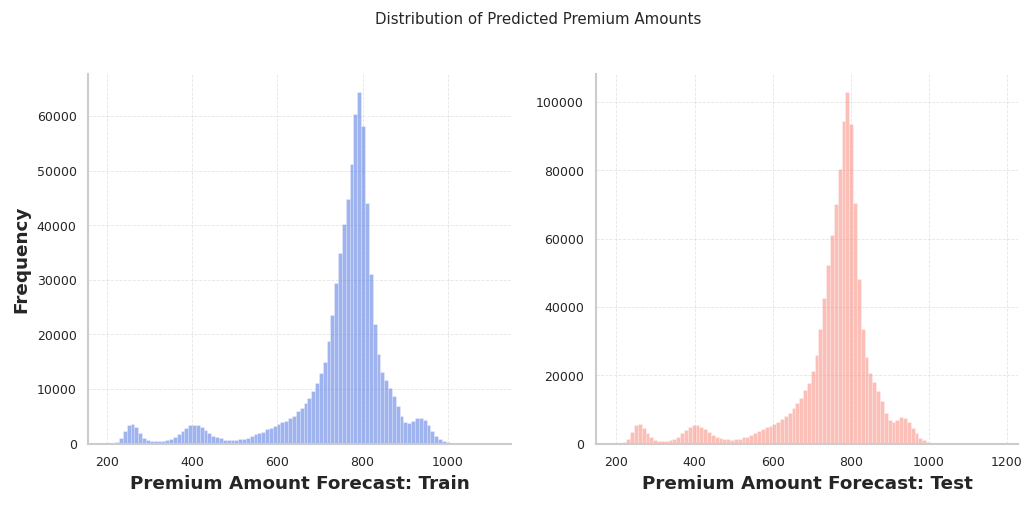

LGBM_0    195.764214
dtype: float64 LGBM_0    1180.312173
dtype: float64 LGBM_0    746.356012
dtype: float64 LGBM_0    776.367381
dtype: float64
Results of LGBM_0 all saved


In [53]:
(df_test_for,train_forecast_to_store) = store_results(for_test=df_subm_stack,for_train=oof_results_stack, model="LGBM", experiment=0)

In [56]:
df_test_for.max(),train_forecast_to_store.max()

(Premium Amount    1103.906685
 dtype: float64,
 LGBM_0    1180.312173
 dtype: float64)

In [57]:
train_forecast_to_store

,LGBM_0
0,962.406787
1,747.365718
2,822.356620
3,797.303264
4,799.734613
...,...
1199995,870.610073
1199996,760.847070
1199997,465.940076
1199998,916.910299
